In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as npr

In [2]:
file=open('weights1.pickle','rb')

In [3]:
young=pickle.load(file)
old=pickle.load(file)
both=pickle.load(file)

In [5]:
file.close()

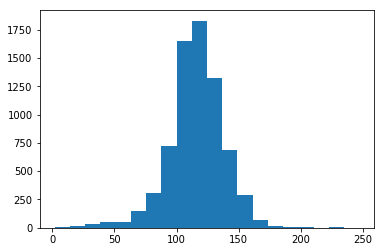

In [6]:
plt.hist(young,bins=20);

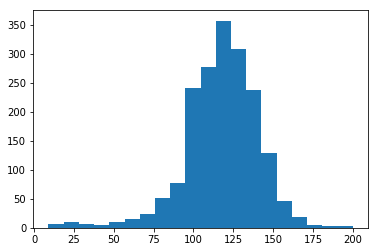

In [7]:
plt.hist(old,bins=20);

## (a) 

**On the same graph, plot normalized histograms of the same data set. Adjust the number of bins so that differences in the weights of the babies can be readily observed.**

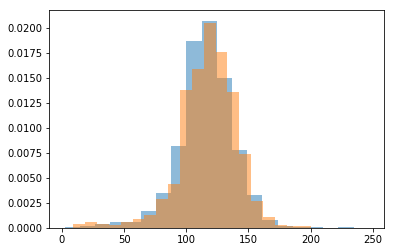

In [166]:
plt.hist(young,bins=20,alpha=0.5,normed=True);
plt.hist(old,bins=20,alpha=0.5,normed=True);

## (b),(c)

**Determine the average and median for each data set**

In [8]:
young.mean(),old.mean()

(115.88054938956715, 117.70546448087431)

In [9]:
np.median(young),np.median(old)

(117.0, 119.0)

## (d)

**Based on these observations, which have heavier babies, younger mothers or older mothers? Briefly explain.**

Older mothers. The average and median weights for the older mothers are higher than for those in the younger cohort.

## (e) 

**Determine the proportion of births that are over 8 pounds for each class.**

In [20]:
young_over8=np.sum(young>128)/len(young)
print(young_over8)

0.2561043285238624


In [21]:
old_over8=np.sum(old>=128)/len(old)
print(old_over8)

0.3360655737704918


In [22]:
diff=old_over8-young_over8
diff

0.0799612452466294

## (f) 

**Use resampling (simulation) to determine if the effect observed in part () is statistically significant (at the p<=0.05 level). Provide your code, a clear conclusion, and a brief discussion of why you made that conclusion.**

In [23]:
num_sims=10
count=0
for sim in range(num_sims):
    permuted=npr.permutation(both)
    newyoung=permuted[:len(young)]
    newold=permuted[len(young):]
    py=np.sum(newyoung>132)/len(young)
    po=np.sum(newold>132)/len(old)
    print(po-py)
    if (po-py)>diff:
        count+=1
print(count/num_sims)

-0.003407719413159621
0.016462582558541494
0.0013885603731130791
0.019203313864983057
-0.008203999199432321
-0.008203999199432321
-0.010944730505873856
0.021944045171424592
-0.006833633546211554
-0.0006669881067180861
0.0


In [1]:
def big_babies_test (weight, num_sims=10000):
    diff=np.sum(old>weight)/len(old)-np.sum(young>weight)/len(young)    
    count=0
    for sim in range(num_sims):
        permuted=npr.permutation(both)
        newyoung=permuted[:len(young)]
        newold=permuted[len(young):]
        py=np.sum(newyoung>weight)/len(young)
        po=np.sum(newold>weight)/len(old)
        #print(po-py)
        if abs(po-py)>diff:
            count+=1
    print("Probability of observing a proportion difference this large under null hypothesis is approximately",\
          count/num_sims)

In [48]:
big_babies_test(128)

Probability of observing a proportion difference this large under null hypothesis is approximately 0.0


The probability of observing a difference in averages as large as the observed difference (approximately 0.08) is too small to even estimate well with the simulation. Thus, the result is statistically signficant at the $p<0.05$ (or even $p< 0.001$) level. When we pool the data and sample from it (here I showed a Monte Carlo permuatation test), we never observed a case of such a large difference in average weights over 10000 simulation runs. Thus, the observed difference is likely to be a real phenomenon and not just caused by random sampling.

